In [20]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [22]:
x_train.shape

(60000, 28, 28)

In [23]:
#normalize
x_train, x_test = x_train / 255, x_test / 255

In [24]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation = "relu"),
    Dense(64, activation = "relu"),
    Dense(10, activation = "softmax")
])

In [25]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
model.compile(
    optimizer = SGD(),
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)
history = model.fit(x_train, y_train, epochs=11, validation_data=(x_test, y_test))

Epoch 1/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6222 - accuracy: 0.8309 - val_loss: 0.3159 - val_accuracy: 0.9098
Epoch 2/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2931 - accuracy: 0.9157 - val_loss: 0.2500 - val_accuracy: 0.9279
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2412 - accuracy: 0.9304 - val_loss: 0.2202 - val_accuracy: 0.9349
Epoch 4/11
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2081 - accuracy: 0.9399 - val_loss: 0.1910 - val_accuracy: 0.9433
Epoch 5/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1845 - accuracy: 0.9462 - val_loss: 0.1732 - val_accuracy: 0.9477
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1654 - accuracy: 0.9524 - val_loss: 0.1600 - val_accuracy: 0.9532
Epoch 7/11
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1505 - accuracy: 0.9569 - val_loss: 0.1485 - val_accuracy:

In [28]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test loss is {test_loss}")
print(f"Test accuracy is {test_acc}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1163 - accuracy: 0.9652
Test loss is 0.11626152694225311
Test accuracy is 0.9652000069618225


In [33]:
history.history??

Type:        dict
String form: {'loss': [0.6221759915351868, 0.29305052757263184, 0.2412337362766266, 0.208135724067688, 0.18446752429008484, 0.16544656455516815, 0.150465190410614, 0.13751840591430664, 0.12682859599590302, 0.11733116954565048, 0.10936424136161804], 'accuracy': [0.8308666944503784, 0.9157333374023438, 0.9304166436195374, 0.9399499893188477, 0.9461666941642761, 0.9524166584014893, 0.9569000005722046, 0.9602000117301941, 0.9634333252906799, 0.9660833477973938, 0.9681666493415833], 'val_loss': [0.3159210681915283, 0.2500417232513428, 0.22024860978126526, 0.19102777540683746, 0.17323371767997742, 0.16003888845443726, 0.14848528802394867, 0.1399393081665039, 0.12718819081783295, 0.11984679847955704, 0.11626152694225311], 'val_accuracy': [0.9097999930381775, 0.9279000163078308, 0.9348999857902527, 0.9433000087738037, 0.947700023651123, 0.9531999826431274, 0.9553999900817871, 0.9596999883651733, 0.9629999995231628, 0.9638000130653381, 0.9652000069618225]}
Length:      4
Docst

In [36]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

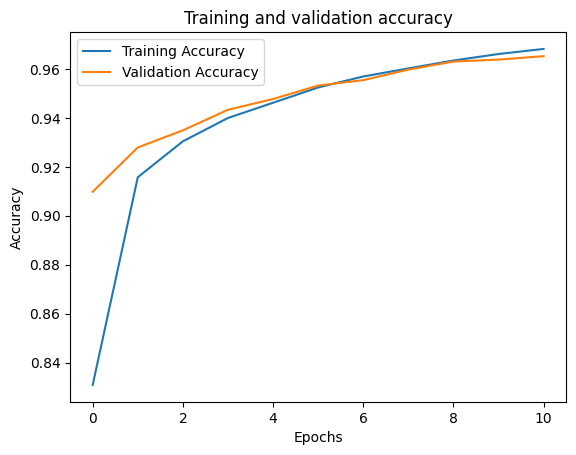

In [38]:
plt.plot(history.history['accuracy'], label = "Training Accuracy")
plt.plot(history.history['val_accuracy'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.show()

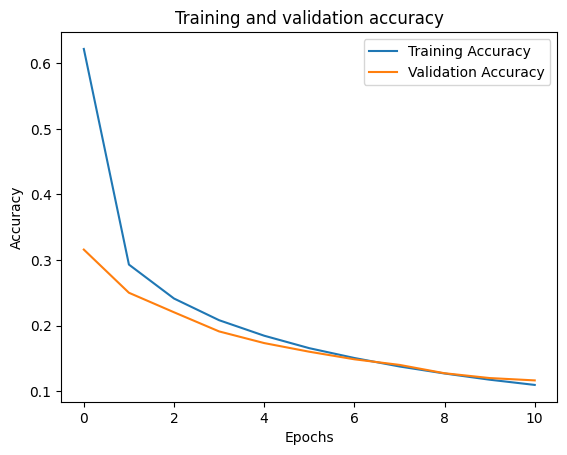

In [40]:
plt.plot(history.history['loss'], label = "Training Accuracy")
plt.plot(history.history['val_loss'], label = "Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

1/1 [==============================] - 0s 94ms/step


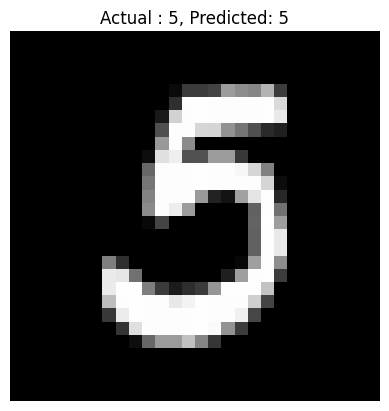

1/1 [==============================] - 0s 20ms/step


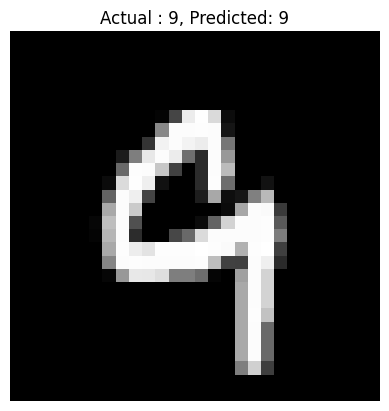

1/1 [==============================] - 0s 32ms/step


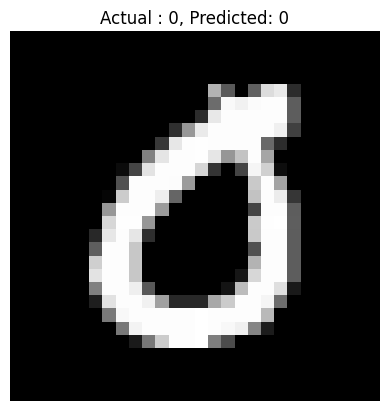

1/1 [==============================] - 0s 26ms/step


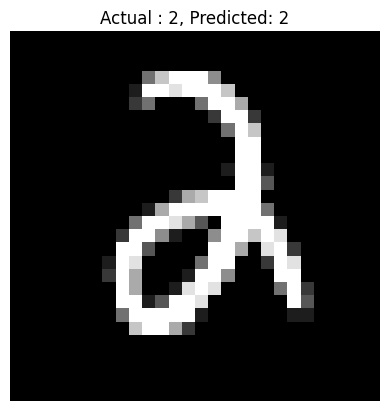

1/1 [==============================] - 0s 19ms/step


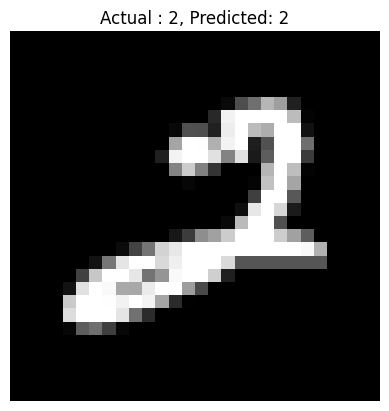

In [42]:
#optional step

num_images = 5
rand_choices = np.random.choice(x_test.shape[0], num_images, replace = False)

for i, index in enumerate(rand_choices):
    img = x_test[index]
    label = y_test[index]

    pred = model.predict(np.expand_dims(img, axis = 0))
    pred_label = np.argmax(pred)

    plt.imshow(img, cmap = "gray")
    plt.title(f"Actual : {label}, Predicted: {pred_label}")
    plt.axis("off")
    plt.show()